Dataset Preview:
   age  salary  experience  purchased
0   20      30           1          0
1   30      50           3          1
2   25      40           2          0
3   40      70          10          1
4   45      80          15          1

Selected Features: ['age', 'salary']

Model Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



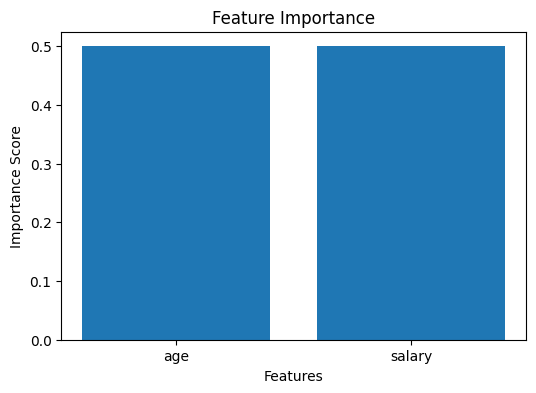

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'age': [20, 30, 25, 40, 45, 50, 23, 36, 29, 55],
    'salary': [30, 50, 40, 70, 80, 95, 35, 60, 45, 100],
    'experience': [1, 3, 2, 10, 15, 20, 1, 7, 3, 22],
    'purchased': [0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
})

print("Dataset Preview:")
print(data.head())

X = data[['age', 'salary', 'experience']]
y = data['purchased']

selector = SelectKBest(score_func=f_classif, k=2)
selected_features = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print("\nSelected Features:", list(selected_columns))


X_train, X_test, y_train, y_test = train_test_split(
    X[selected_columns], y, test_size=0.3, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importances = model.feature_importances_

plt.figure(figsize=(6,4))
plt.bar(selected_columns, importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


Dataset Preview:
   age  salary  experience  purchased
0   20      30           1          0
1   30      50           3          1
2   25      40           2          0
3   40      70          10          1
4   45      80          15          1

Selected Features: ['age', 'salary']

Model Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



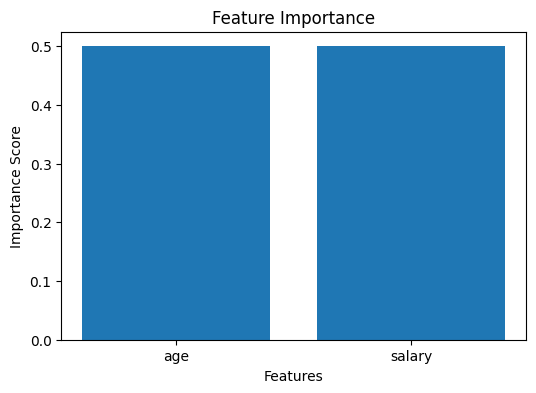

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'age': [20, 30, 25, 40, 45, 50, 23, 36, 29, 55],
    'salary': [30, 50, 40, 70, 80, 95, 35, 60, 45, 100],
    'experience': [1, 3, 2, 10, 15, 20, 1, 7, 3, 22],
    'purchased': [0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
})

print("Dataset Preview:")
print(data.head())

x = data[['age', 'salary', 'experience']]
y = data['purchased']

selector = SelectKBest(score_func=f_classif, k=2)
selected_features = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print("\nSelected Features:", list(selected_columns))


X_train, X_test, y_train, y_test = train_test_split(
    X[selected_columns], y, test_size=0.3, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importances = model.feature_importances_

plt.figure(figsize=(6,4))
plt.bar(selected_columns, importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


Dataset Preview:
   age  salary  experience  credit_score  purchased
0   21      25           1           600          0
1   25      40           3           680          0
2   45      80          20           720          1
3   32      50           7           650          0
4   56     100          25           780          1


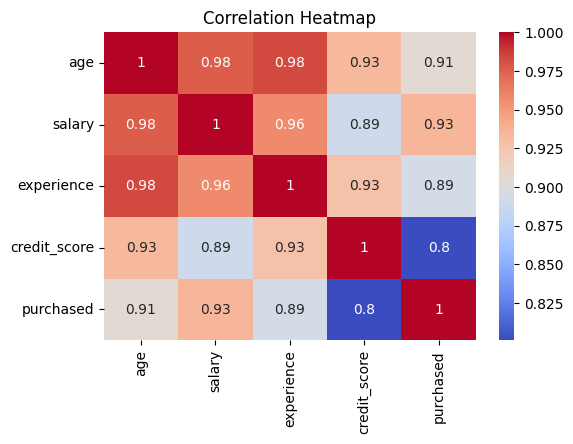

Selected Features: ['age', 'salary', 'experience']

Random Forest Accuracy: 1.0

Logistic Regression Accuracy: 1.0

Best Model: Logistic Regression


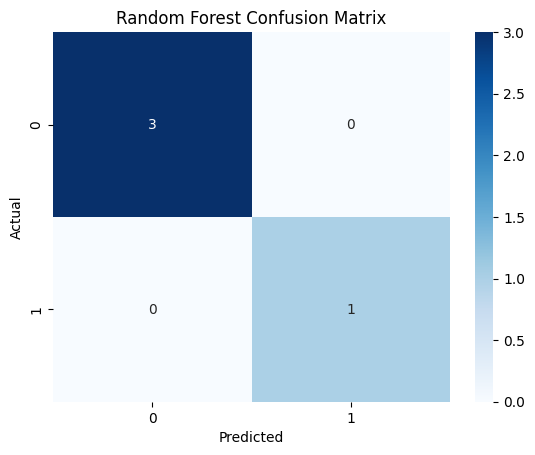


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Cross Validation Scores: [1. 1. 1. 1. 1.]
Average CV Score: 1.0


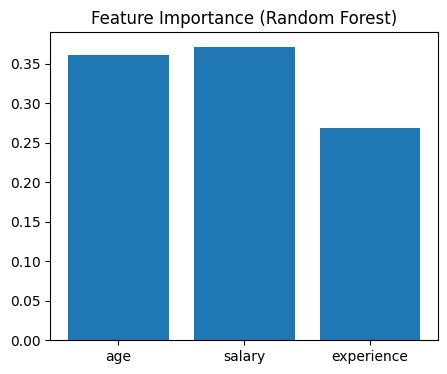

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

data = pd.DataFrame({
    'age': [21,25,45,32,56,42,23,50,60,33,29,48],
    'salary': [25,40,80,50,100,90,30,85,110,55,40,95],
    'experience': [1,3,20,7,25,15,1,18,30,8,4,16],
    'credit_score': [600,680,720,650,780,700,630,740,800,660,690,710],
    'purchased': [0,0,1,0,1,1,0,1,1,0,0,1]})

print("Dataset Preview:")
print(data.head())

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

X = data.drop('purchased', axis=1)
y = data['purchased']

selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)
selected_cols = X.columns[selector.get_support()]

print("Selected Features:", list(selected_cols))

X_train, X_test, y_train, y_test = train_test_split(
    X[selected_cols], y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Accuracy:", rf_accuracy)


logr = LogisticRegression()
logr.fit(X_train_scaled, y_train)
logr_pred = logr.predict(X_test_scaled)

log_accuracy = accuracy_score(y_test, logr_pred)
print("\nLogistic Regression Accuracy:", log_accuracy)

print("\nBest Model:",
      "Random Forest" if rf_accuracy > log_accuracy else "Logistic Regression")

cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))

scores = cross_val_score(rf, X[selected_cols], y, cv=5)
print("\nCross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

plt.figure(figsize=(5,4))
plt.bar(selected_cols, rf.feature_importances_)
plt.title("Feature Importance (Random Forest)")
plt.show()


   age  salary  experience  credit_score  purchased
0   21      25           1           600          0
1   25      40           3           680          0
2   45      80          20           720          1
3   32      50           7           650          0
4   56     100          25           780          1


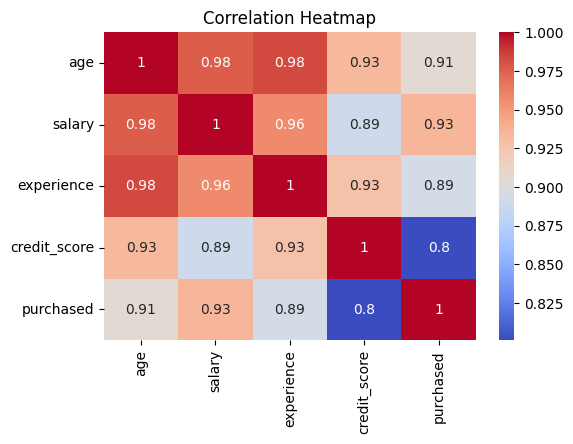

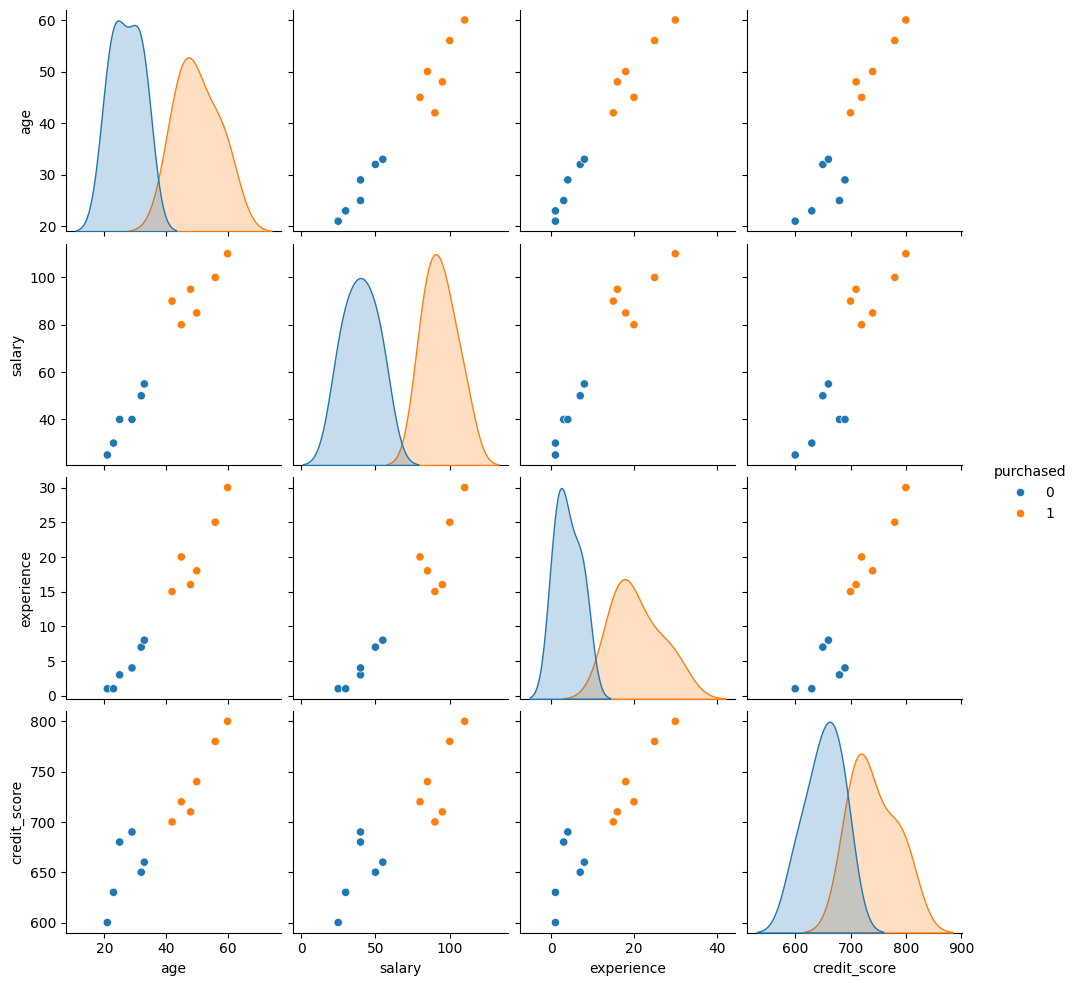

Index(['age', 'salary', 'experience'], dtype='object')
RF Accuracy: 1.0
LR Accuracy: 1.0


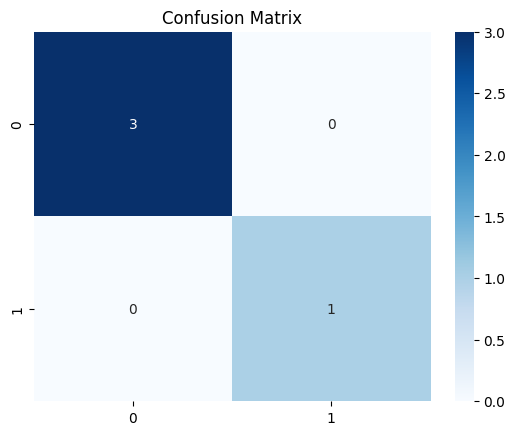

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

CV Scores: [1. 1. 1. 1. 1.]
CV Mean: 1.0


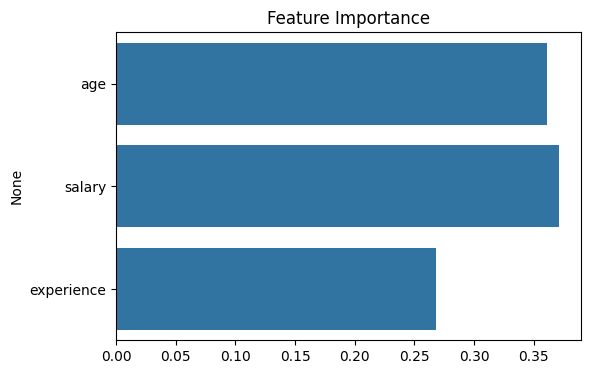

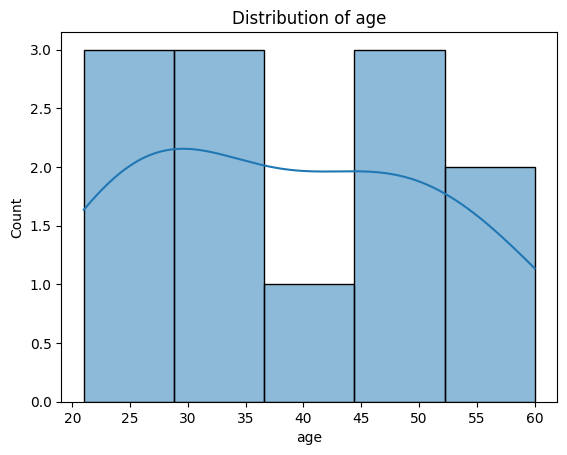

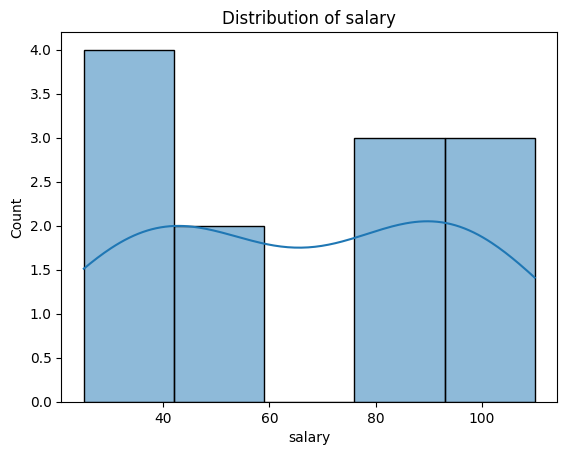

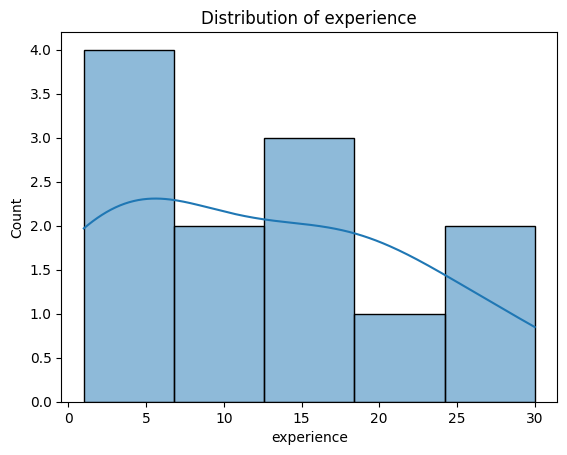

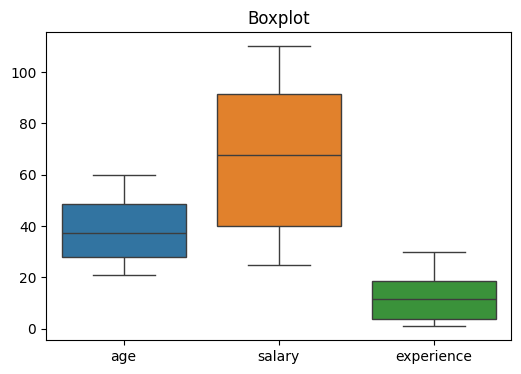

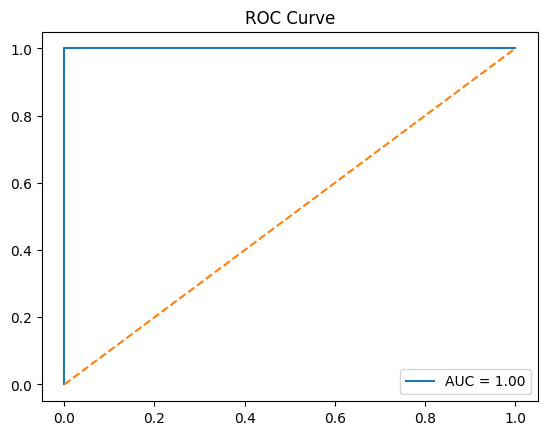

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

data = pd.DataFrame({
    'age': [21,25,45,32,56,42,23,50,60,33,29,48],
    'salary': [25,40,80,50,100,90,30,85,110,55,40,95],
    'experience': [1,3,20,7,25,15,1,18,30,8,4,16],
    'credit_score': [600,680,720,650,780,700,630,740,800,660,690,710],
    'purchased': [0,0,1,0,1,1,0,1,1,0,0,1]
})

print(data.head())

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(data, hue="purchased")
plt.show()

X = data.drop('purchased', axis=1)
y = data['purchased']

selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)
selected_cols = X.columns[selector.get_support()]
print(selected_cols)

X_train, X_test, y_train, y_test = train_test_split(
    X[selected_cols], y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
print("RF Accuracy:", accuracy_score(y_test, rf_pred))

logr = LogisticRegression()
logr.fit(X_train_scaled, y_train)
logr_pred = logr.predict(X_test_scaled)
print("LR Accuracy:", accuracy_score(y_test, logr_pred))

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, rf_pred))

scores = cross_val_score(rf, X[selected_cols], y, cv=5)
print("CV Scores:", scores)
print("CV Mean:", scores.mean())

plt.figure(figsize=(6,4))
sns.barplot(x=rf.feature_importances_, y=selected_cols)
plt.title("Feature Importance")
plt.show()

for col in selected_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=data[selected_cols])
plt.title("Boxplot")
plt.show()

probs = rf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.legend()
plt.show()
